In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from sklearn.preprocessing import LabelEncoder

# Sidetable
!pip install sidetable
import sidetable as stb

# Scaler
from sklearn.preprocessing import normalize,StandardScaler

# Encoder
from sklearn.preprocessing import LabelEncoder

# Train Test Split
from sklearn.model_selection import train_test_split

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost.xgbclassifier import XGBClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Classification Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report,log_loss

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
from sklearn.decomposition import PCA

# Optimiser
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
!pip install scikit-optimize
from skopt import BayesSearchCV
!pip install hyperopt
from hyperopt import fmin, tpe, hp, Trials
!pip install optuna
import optuna

# Styler
def highlight_nans(val):
    color = 'red' if pd.isna(val) else ''
    return f'background-color: {color}'
from IPython.display import clear_output

# Max Columns Viewer
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from IPython.display import clear_output
clear_output()

In [2]:
# read 'Titanic-Dataset.csv'
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# investigate shape
df.shape

(891, 12)

In [4]:
# investigate columns length and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# investigate columns that consist null values
df_isna = df.isna().sum()
df_isna[df_isna > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
# Investigate unique values in each column
df_str = df.copy()
for i in df_str.columns:
    df_str[i] = df_str[i].apply(lambda x: str(x))
df_str.replace('nan',np.nan,inplace=True)

df_str.describe(include='object').T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
PassengerId,891,891,1,1
Name,891,891,"Braund, Mr. Owen Harris",1
Ticket,891,681,347082,7
Fare,891,248,8.05,43
Cabin,204,147,B96 B98,4
Age,714,88,24.0,30
SibSp,891,7,0,608
Parch,891,7,0,678
Pclass,891,3,3,491
Embarked,889,3,S,644


In [7]:
# create new df and drop columns
df = df.drop(columns=[
    # too many unique values
    'PassengerId','Name','Ticket',
    # too many null values
    'Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
# unique value numbers in each columns after dropping
df_str = df.copy()
for i in df_str.columns:
  df_str[i] = df_str[i].apply(lambda x:str(x))
df_str.replace('nan',np.nan,inplace=True)

df_unique = df_str.describe(include='object').T.sort_values(by='unique',ascending=False)
df = df[df_unique.index]
df_unique

,count,unique,top,freq
Fare,891,248,8.05,43
Age,714,88,24.0,30
SibSp,891,7,0,608
Parch,891,7,0,678
Pclass,891,3,3,491
Embarked,889,3,S,644
Survived,891,2,0,549
Sex,891,2,male,577


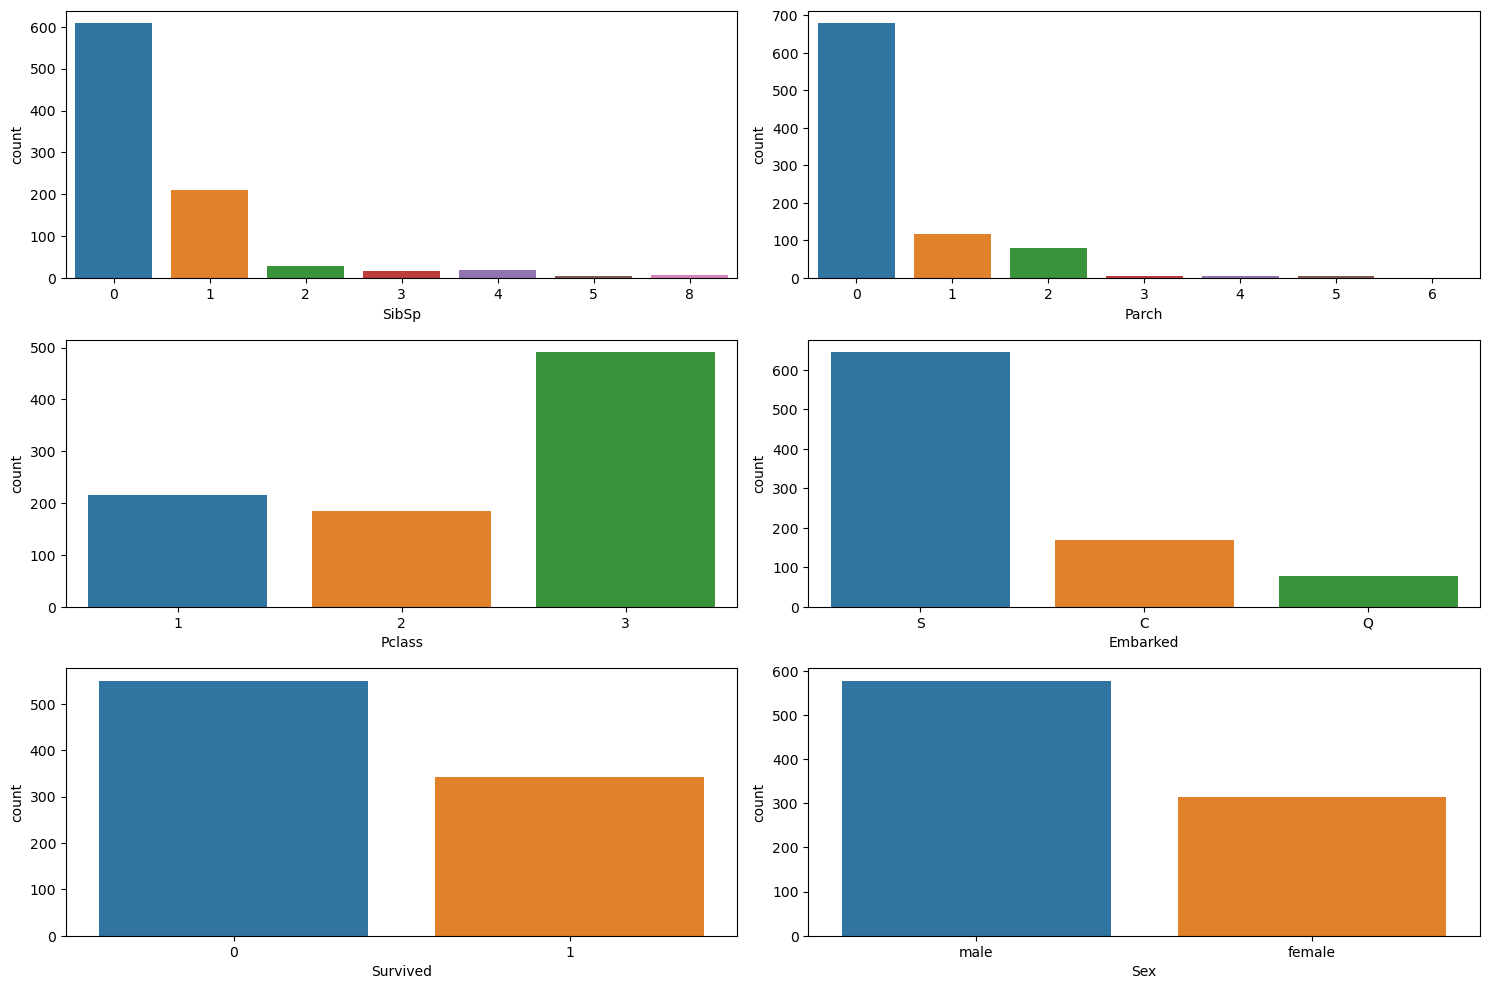

In [9]:
# visualise categorical columns
fig,axes=plt.subplots(3,2,figsize=(15,10))
sns.countplot(data=df,x=df.columns[2],ax=axes[0,0])
sns.countplot(data=df,x=df.columns[3],ax=axes[0,1])
sns.countplot(data=df,x=df.columns[4],ax=axes[1,0])
sns.countplot(data=df,x=df.columns[5],ax=axes[1,1])
sns.countplot(data=df,x=df.columns[6],ax=axes[2,0])
sns.countplot(data=df,x=df.columns[7],ax=axes[2,1])
plt.tight_layout()

<Axes: >

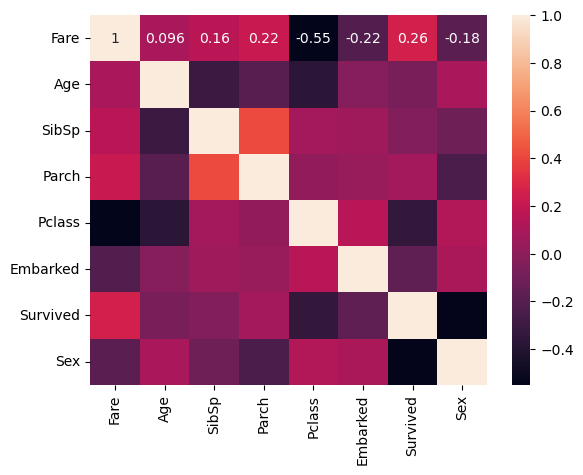

In [10]:
# correlation of each columns
cat_encs = ['Embarked','Sex']

le = LabelEncoder()

df_cat = df.copy()

for i in cat_encs:
  df_cat[i] = le.fit_transform(df_cat[i])

sns.heatmap(df_cat.corr(),annot=True)

In [11]:
# correlation of each column to the target column
pd.DataFrame(df_cat.corr()['Survived']).sort_values(by='Survived',ascending=False).iloc[1:]

,Survived
Fare,0.257307
Parch,0.081629
SibSp,-0.035322
Age,-0.077221
Embarked,-0.163517
Pclass,-0.338481
Sex,-0.543351


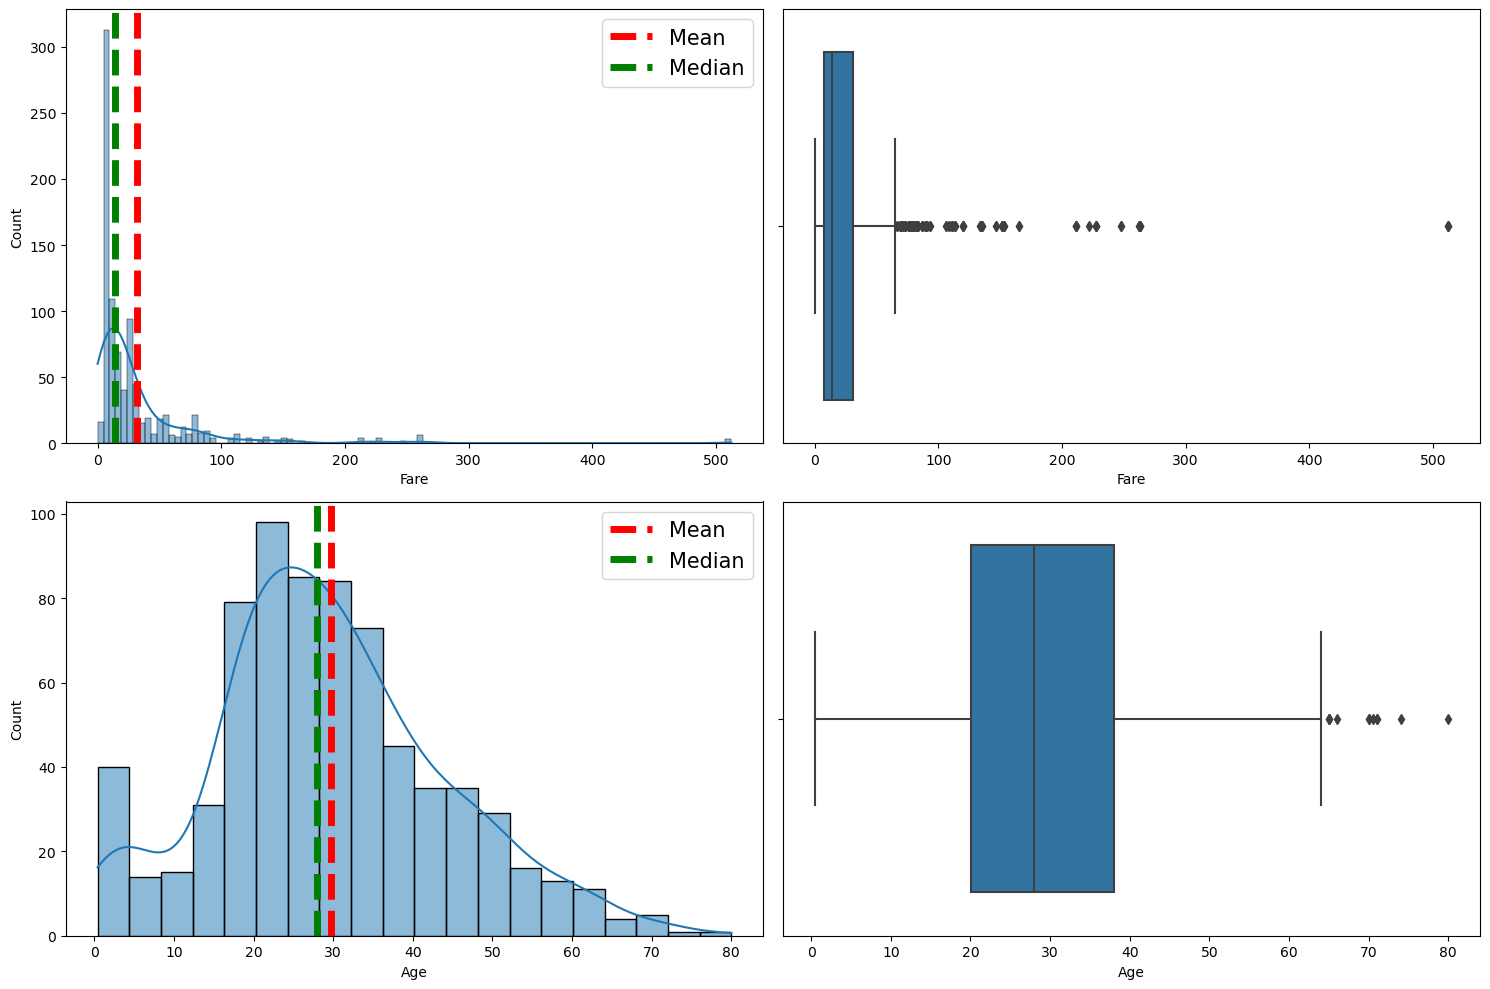

In [12]:
# visualise numerical columns
fig,axes=plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=df,x=df.columns[0],kde=True,ax=axes[0,0])
axes[0,0].axvline(df[df.columns[0]].mean(),color='red',linestyle='--',linewidth=5,label='Mean')
axes[0,0].axvline(df[df.columns[0]].median(),color='green',linestyle='--',linewidth=5,label='Median')
axes[0,0].legend(fontsize=15)
sns.boxplot(data=df,x=df.columns[0],ax=axes[0,1])

sns.histplot(data=df,x=df.columns[1],kde=True,ax=axes[1,0])
axes[1,0].axvline(df[df.columns[1]].mean(),color='red',linestyle='--',linewidth=5,label='Mean')
axes[1,0].axvline(df[df.columns[1]].median(),color='green',linestyle='--',linewidth=5,label='Median')
axes[1,0].legend(fontsize=15)
sns.boxplot(data=df,x=df.columns[1],ax=axes[1,1])
plt.tight_layout()

<Axes: xlabel='Fare', ylabel='Age'>

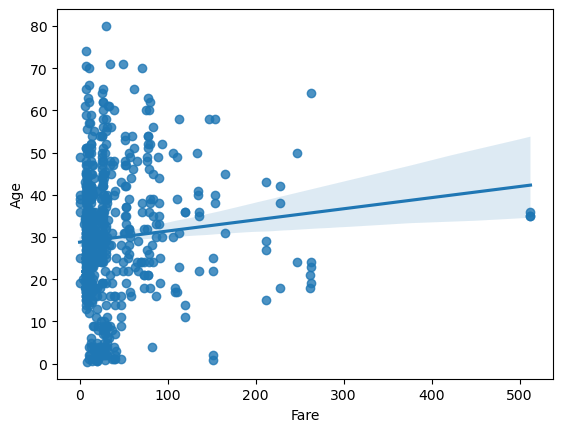

In [13]:
# correlation of each numerical columns
sns.regplot(data=df,x='Fare',y='Age')

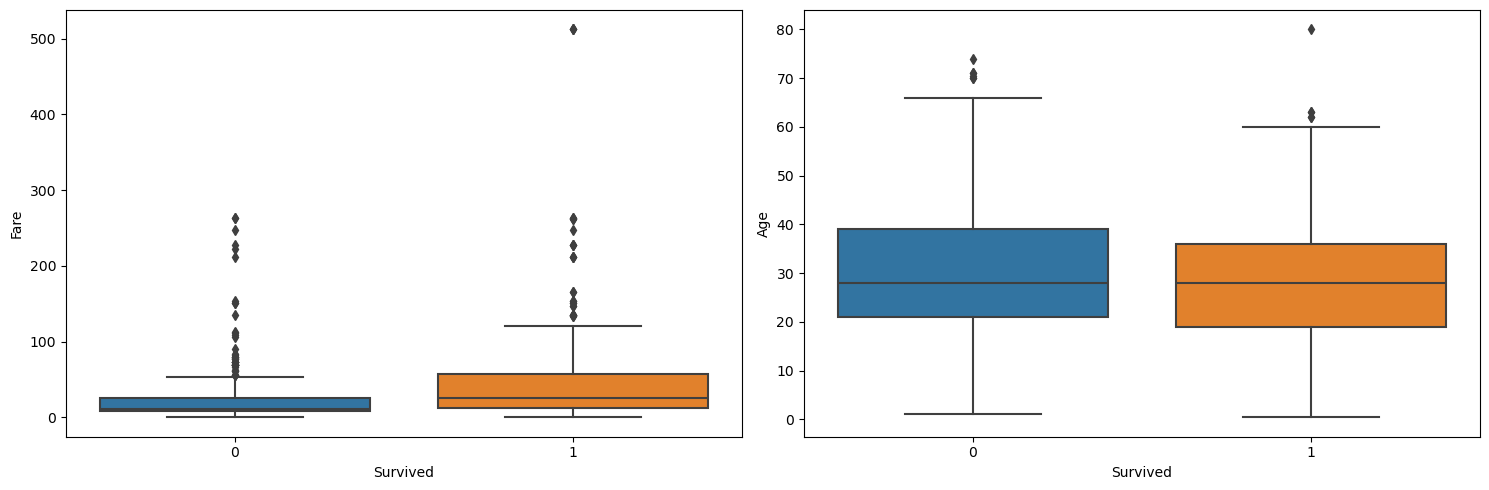

In [14]:
# correlation of each numerical column to the target column
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df,x=df.columns[6],y=df.columns[0],ax=axes[0])
sns.boxplot(data=df,x=df.columns[6],y=df.columns[1],ax=axes[1])
plt.tight_layout()

In [15]:
# inspect the outliers in 'Fare' columns
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
outliers.sort_values(by='Fare',ascending=False).head()

,Fare,Age,SibSp,Parch,Pclass,Embarked,Survived,Sex
679,512.3292,36.0,0,1,1,C,1,male
258,512.3292,35.0,0,0,1,C,1,female
737,512.3292,35.0,0,0,1,C,1,male
341,263.0000,24.0,3,2,1,S,1,female
438,263.0000,64.0,1,4,1,S,0,male


<Axes: xlabel='Fare', ylabel='Age'>

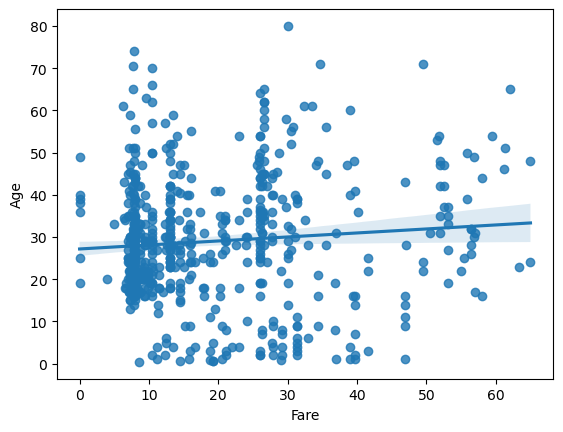

In [16]:
# correlation of the numerical columns after the outlier dropping
sns.regplot(data=df,x='Fare',y='Age')

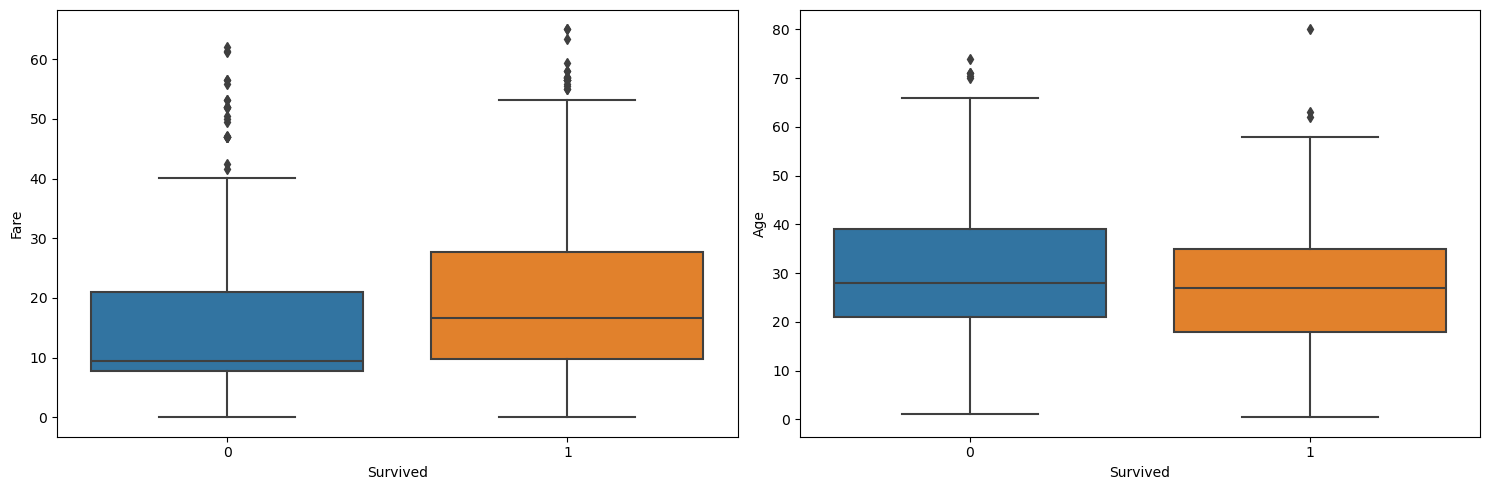

In [17]:
# correlation of each numerical column to the target column after the 
# outlier dropping
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df,x=df.columns[6],y=df.columns[0],ax=axes[0])
sns.boxplot(data=df,x=df.columns[6],y=df.columns[1],ax=axes[1])
plt.tight_layout()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fare      775 non-null    float64
 1   Age       613 non-null    float64
 2   SibSp     775 non-null    int64  
 3   Parch     775 non-null    int64  
 4   Pclass    775 non-null    int64  
 5   Embarked  775 non-null    object 
 6   Survived  775 non-null    int64  
 7   Sex       775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.5+ KB


In [19]:
df[df['Age'].isna()].head()

,Fare,Age,SibSp,Parch,Pclass,Embarked,Survived,Sex
5,8.4583,NaN,0,0,3,Q,0,male
17,13.0000,NaN,0,0,2,S,1,male
19,7.2250,NaN,0,0,3,C,1,female
26,7.2250,NaN,0,0,3,C,0,male
28,7.8792,NaN,0,0,3,Q,1,female


In [20]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fare      775 non-null    float64
 1   Age       775 non-null    float64
 2   SibSp     775 non-null    int64  
 3   Parch     775 non-null    int64  
 4   Pclass    775 non-null    int64  
 5   Embarked  775 non-null    object 
 6   Survived  775 non-null    int64  
 7   Sex       775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.5+ KB


In [21]:
# split the data into train and test
X = df.drop(columns=['Survived'])
y = df[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=7)

# encode the categorical columns
cat_encs = ['Embarked','Sex']

le = LabelEncoder()

for col in cat_encs:
    le.fit(df[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# scale the data with normalize function
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

X_train = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [22]:
# target variable unique value counts
y_train.stb.freq(['Survived'])

,Survived,count,percent,cumulative_count,cumulative_percent
0,0,403,65.0,403,65.0
1,1,217,35.0,620,100.0


In [23]:
from lightgbm import LGBMClassifier
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(silent=True,random_state=42),
    'Naive Bayes': GaussianNB(),
}

accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []
loglosses = []
durs = []

for name, model in models.items():
    start = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = datetime.now()
    dur = str(end-start)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
    logloss = log_loss(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    roc_aucs.append(roc_auc)
    loglosses.append(logloss)
    durs.append(dur)

clear_output()

In [24]:
model_df = pd.DataFrame({'Model Name':models.keys(),
                         'Accuracies':accuracies,
                         'Precisions':precisions,
                         'Recall':recalls,
                         'F1s':f1s,
                         'ROC AUX':roc_aucs,
                         'Loglosses':loglosses,
                         'Durations':durs})
model_df = model_df.sort_values(by='F1s',ascending=False).reset_index(drop=True)
model_df

,Model Name,Accuracies,Precisions,Recall,F1s,ROC AUX,Loglosses,Durations
0,CatBoost,0.819355,0.783002,0.789888,0.786249,0.789888,6.511112,0:00:02.361629
1,Random Forest,0.812903,0.775641,0.791584,0.782440,0.791584,6.743651,0:00:00.298974
2,Gradient Boosting,0.806452,0.767913,0.774432,0.770981,0.774432,6.976191,0:00:00.233607
3,XGBoost,0.800000,0.760493,0.769844,0.764749,0.769844,7.208731,0:00:00.094706
4,LightGBM,0.800000,0.760343,0.763562,0.761905,0.763562,7.208731,0:00:01.069608
5,Decision Tree,0.767742,0.723810,0.734344,0.728388,0.734344,8.371429,0:00:00.008001
6,Naive Bayes,0.741935,0.687500,0.672018,0.678156,0.672018,9.301588,0:00:00.004001


In [25]:
feat_imp = pd.DataFrame({"Columns Name":X_train.columns,
                         "Feature Importance":models[model_df.iloc[0,0]].feature_importances_})
feat_imp = feat_imp.sort_values(by='Feature Importance',ascending=False).reset_index(drop=True)
feat_imp

,Columns Name,Feature Importance
0,Sex,29.362936
1,Pclass,16.575453
2,Embarked,14.765098
3,Fare,11.479929
4,Age,11.067157
5,SibSp,10.050549
6,Parch,6.698878


In [26]:
featimp_accuracies = []
featimp_precisions = []
featimp_recalls = []
featimp_f1s = []
featimp_roc_aucs = []
featimp_loglosses = []

for i in range(1,df.shape[1]+1):
  feat_imp_col = feat_imp.iloc[:i,0]

  model = CatBoostClassifier(silent=True,random_state=42)
  model.fit(X_train[feat_imp_col], y_train)
  y_pred = model.predict(X_test[feat_imp_col])

  featimp_accuracy = accuracy_score(y_test, y_pred)
  featimp_precision = precision_score(y_test, y_pred, average='macro')
  featimp_recall = recall_score(y_test, y_pred, average='macro')
  featimp_f1 = f1_score(y_test, y_pred, average='macro')
  featimp_cm = confusion_matrix(y_test, y_pred)
  featimp_roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
  featimp_report = classification_report(y_test, y_pred)
  featimp_logloss = log_loss(y_test, y_pred)

  featimp_accuracies.append(featimp_accuracy)
  featimp_precisions.append(featimp_precision)
  featimp_recalls.append(featimp_recall)
  featimp_f1s.append(featimp_f1)
  featimp_roc_aucs.append(featimp_roc_auc)
  featimp_loglosses.append(featimp_logloss)

clear_output()

In [27]:
model_df_featImp = pd.DataFrame({'Cols Num':[i for i in range(1,df.shape[1]+1)],
                                 'Accuracies':featimp_accuracies,
                                 'Precisions':featimp_precisions,
                                 'Recall':featimp_recalls,
                                 'F1s':featimp_f1s,
                                 'ROC AUX':featimp_roc_aucs,
                                 'Loglosses':featimp_loglosses})
model_df_featImp = model_df_featImp.sort_values(by='F1s',ascending=False).reset_index(drop=True)
model_df_featImp

,Cols Num,Accuracies,Precisions,Recall,F1s,ROC AUX,Loglosses
0,3,0.832258,0.800573,0.792780,0.796465,0.792780,6.046032
1,2,0.825806,0.790335,0.800758,0.795104,0.800758,6.278572
2,4,0.819355,0.783002,0.789888,0.786249,0.789888,6.511112
3,5,0.812903,0.775414,0.785301,0.779927,0.785301,6.743651
4,7,0.806452,0.767913,0.774432,0.770981,0.774432,6.976191
5,8,0.806452,0.767913,0.774432,0.770981,0.774432,6.976191
6,6,0.800000,0.761029,0.776127,0.767436,0.776127,7.208731
7,1,0.774194,0.733259,0.751496,0.740294,0.751496,8.138889
